In [52]:
from k_means_const_manhattan import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Creating the delivery Locations

In [53]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

## Visualizing the data

In [54]:
def initial_plot(delivery_loc):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    plt.title("Delivery Locations")
    plt.show()

In [55]:
def clusters_plot(clusters, centroids):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.title("After Clustering")
    plt.show()

In [56]:
def dp_plot(clusters, centroids, dp):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.scatter(dp[0], dp[1], marker='+',s=200, c="red")
    plt.title("After DP Creation")
    plt.show()

In [57]:
def final_plot(clusters, dp):
    colors = ['blue', 'green', 'orange', 'purple', 'brown']

    for i in clusters:
        pts = np.array(clusters[i])
        plt.scatter(pts[:,0], pts[:,1])
        #try
        points = pts[1:-1,:]
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try

        for j in range(len(pts)-1):
            pt_1 = pts[j]
            pt_2 = pts[j+1]

            # x axis
            f_pt = np.array([pt_1[0], pt_1[0]])
            s_pt = np.array([pt_1[1], pt_2[1]])

            # y axis
            t_pt = np.array([pt_1[0], pt_2[0]])
            l_pt = np.array([pt_2[1], pt_2[1]])

            plt.plot(f_pt, s_pt, c=colors[i % len(colors)])
            plt.plot(t_pt, l_pt, c=colors[i % len(colors)])

    plt.scatter(dp[0], dp[1], c="red", marker='X',s=200)
    plt.title("Final Result")
    plt.show()

## KMeans Clustering

In [58]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [59]:
from k_means_constrained import KMeansConstrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

## Calculate DP

In [60]:
def calculate_dp(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return [loc_x, loc_y]

## Traveling Salesman Problem

In [61]:
def calculate_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [62]:
def tsp(cluster, opt_dp):
    cluster.insert(0, opt_dp)
    unvisited = cluster.copy()
    tour = [opt_dp]
    unvisited.remove(opt_dp)

    while unvisited:
        nearest_point = min(unvisited, key=lambda x: calculate_distance(tour[-1], x))
        tour.append(nearest_point)
        unvisited.remove(nearest_point)

    # Return to the starting point to complete the cycle
    tour.append(opt_dp)
    
    return tour

In [63]:
from itertools import permutations

def tsp_brut(cluster, dp):
    path = list(permutations(cluster))
    cost = []
    # add dp at the start and end
    for i in range(len(path)):
        path[i] = list(path[i])
        path[i].append(dp)
        path[i].insert(0, dp)

        # Calculate distance
        points = path[i]
        sum = 0

        for j in range(len(path[i])-1):
            sum += calculate_distance(path[i][j], path[i][j+1])
        cost.append(sum)

    idx = np.argmin(cost)
    return path[idx]

## Main

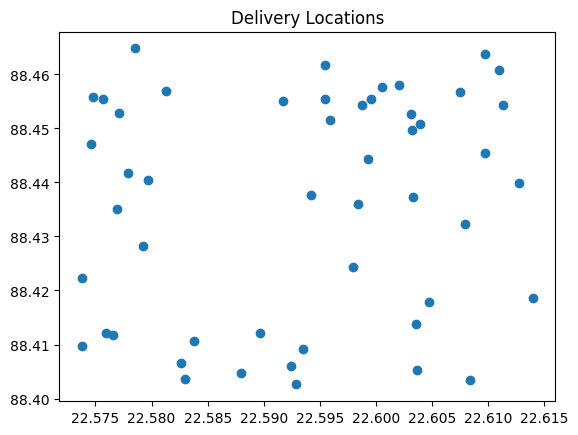

In [64]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc)

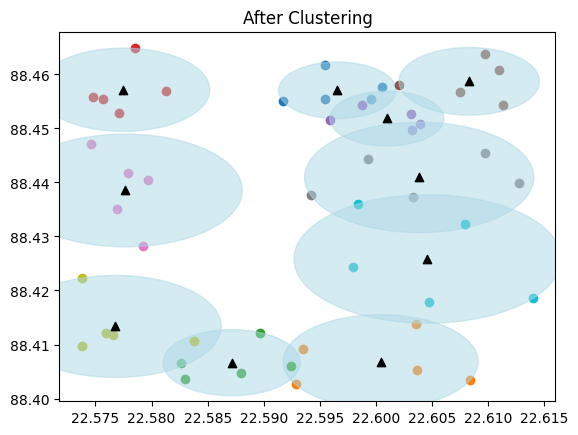

In [65]:
# Cluster the data and get the labels and centroids
centroids, clusters = KMeans(delivery_loc, n, k)

# Visualize the data
clusters_plot(clusters, centroids)

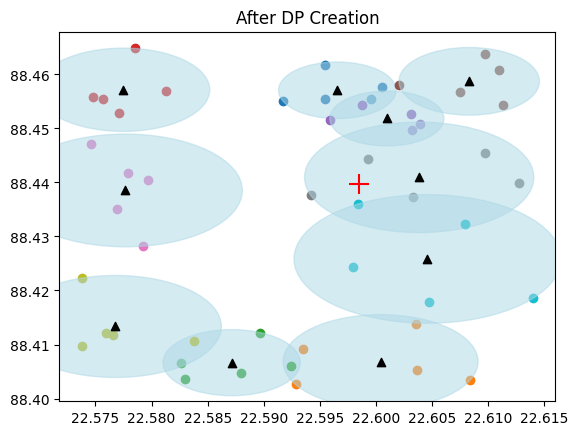

In [66]:
# Calculate DP
DP = calculate_dp(centroids)

# Visualize the data
dp_plot(clusters, centroids, DP)

In [67]:
# Shortest path calculation in each cluster
for i in clusters:
    clusters[i] = tsp(clusters[i], DP)


In [68]:
for i in clusters:
    print("Path",i,":")
    for j in clusters[i]:
        print(j,"->",end=" ")
    print("End")

Path 0 :
[22.598489999999998, 88.43973] -> [22.5996, 88.4554] -> [22.6005, 88.4577] -> [22.5955, 88.4554] -> [22.5917, 88.4551] -> [22.5955, 88.4617] -> [22.598489999999998, 88.43973] -> End
Path 1 :
[22.598489999999998, 88.43973] -> [22.6036, 88.4138] -> [22.6037, 88.4052] -> [22.6084, 88.4034] -> [22.5929, 88.4026] -> [22.5935, 88.4092] -> [22.598489999999998, 88.43973] -> End
Path 2 :
[22.598489999999998, 88.43973] -> [22.5897, 88.4122] -> [22.5924, 88.406] -> [22.588, 88.4047] -> [22.583, 88.4037] -> [22.5826, 88.4066] -> [22.598489999999998, 88.43973] -> End
Path 3 :
[22.598489999999998, 88.43973] -> [22.5813, 88.4569] -> [22.5757, 88.4554] -> [22.5748, 88.4559] -> [22.5771, 88.4528] -> [22.5785, 88.4648] -> [22.598489999999998, 88.43973] -> End
Path 4 :
[22.598489999999998, 88.43973] -> [22.5959, 88.4516] -> [22.5988, 88.4544] -> [22.6031, 88.4526] -> [22.6039, 88.4509] -> [22.6032, 88.4497] -> [22.598489999999998, 88.43973] -> End
Path 5 :
[22.598489999999998, 88.43973] -> [22.6

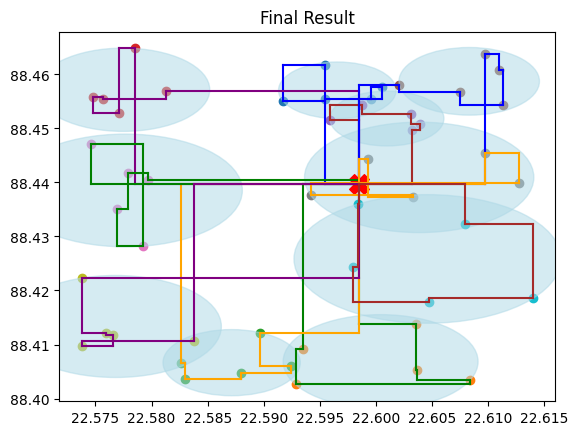

In [69]:
# Final Visualization
final_plot(clusters, DP)

## Calculate Total DIstance

In [70]:
def total_distance(clusters):
    total = 0
    for i in clusters:
        pts = clusters[i]
        for j in range(len(pts)-1):
            total += calculate_distance(pts[j], pts[j+1])
    
    return total

*Total distance in manhattan cluster*

In [71]:
dist_1 = total_distance(clusters)
print("Distance using manhattan cluster :",dist_1)

Distance using manhattan cluster : 0.8718399999999917


*Total distance in euclidian cluster*

Path 0 :
[22.598489999999998, 88.43973] -> [22.5738, 88.4223] -> [22.5759, 88.4122] -> [22.5766, 88.4118] -> [22.5738, 88.4097] -> [22.5838, 88.4107] -> [22.598489999999998, 88.43973] -> End
Path 1 :
[22.598489999999998, 88.43973] -> [22.5996, 88.4554] -> [22.6005, 88.4577] -> [22.5955, 88.4554] -> [22.5917, 88.4551] -> [22.5955, 88.4617] -> [22.598489999999998, 88.43973] -> End
Path 2 :
[22.598489999999998, 88.43973] -> [22.5813, 88.4569] -> [22.5757, 88.4554] -> [22.5748, 88.4559] -> [22.5771, 88.4528] -> [22.5785, 88.4648] -> [22.598489999999998, 88.43973] -> End
Path 3 :
[22.598489999999998, 88.43973] -> [22.5993, 88.4444] -> [22.6033, 88.4373] -> [22.5942, 88.4376] -> [22.6128, 88.4399] -> [22.6097, 88.4455] -> [22.598489999999998, 88.43973] -> End
Path 4 :
[22.598489999999998, 88.43973] -> [22.5897, 88.4122] -> [22.5924, 88.406] -> [22.588, 88.4047] -> [22.583, 88.4037] -> [22.5826, 88.4066] -> [22.598489999999998, 88.43973] -> End
Path 5 :
[22.598489999999998, 88.43973] -> [22.5

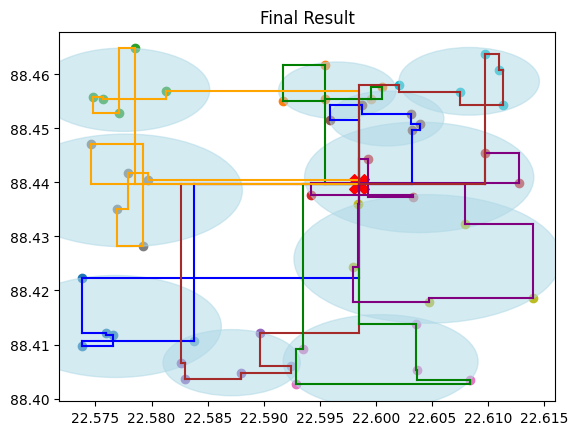

In [72]:
# Cluster the data and get the labels and centroids
centroids_2, clusters_2 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_2 = calculate_dp(centroids_2)

# Shortest path calculation in each cluster
for i in clusters_2:
    clusters_2[i] = tsp(clusters_2[i], DP_2)

for i in clusters_2:
    print("Path",i,":")
    for j in clusters_2[i]:
        print(j,"->",end=" ")
    print("End")

dist_2 = total_distance(clusters_2)
print("\nDistance using euclidian cluster :",dist_2)

final_plot(clusters_2, DP_2)

*Approach 3 : Manhattan cluster with bruteforce TSP*

Path 0 :
[22.597369999999998, 88.44050999999999] -> [22.6037, 88.4052] -> [22.6084, 88.4034] -> [22.5929, 88.4026] -> [22.5924, 88.406] -> [22.5935, 88.4092] -> [22.597369999999998, 88.44050999999999] -> End
Path 1 :
[22.597369999999998, 88.44050999999999] -> [22.6032, 88.4497] -> [22.6039, 88.4509] -> [22.6031, 88.4526] -> [22.5988, 88.4544] -> [22.5959, 88.4516] -> [22.597369999999998, 88.44050999999999] -> End
Path 2 :
[22.597369999999998, 88.44050999999999] -> [22.5897, 88.4122] -> [22.5838, 88.4107] -> [22.5826, 88.4066] -> [22.583, 88.4037] -> [22.588, 88.4047] -> [22.597369999999998, 88.44050999999999] -> End
Path 3 :
[22.597369999999998, 88.44050999999999] -> [22.5792, 88.4282] -> [22.5738, 88.4223] -> [22.5738, 88.4097] -> [22.5759, 88.4122] -> [22.5766, 88.4118] -> [22.597369999999998, 88.44050999999999] -> End
Path 4 :
[22.597369999999998, 88.44050999999999] -> [22.5917, 88.4551] -> [22.5955, 88.4554] -> [22.5955, 88.4617] -> [22.6005, 88.4577] -> [22.5996, 88.4554] -> [22.5

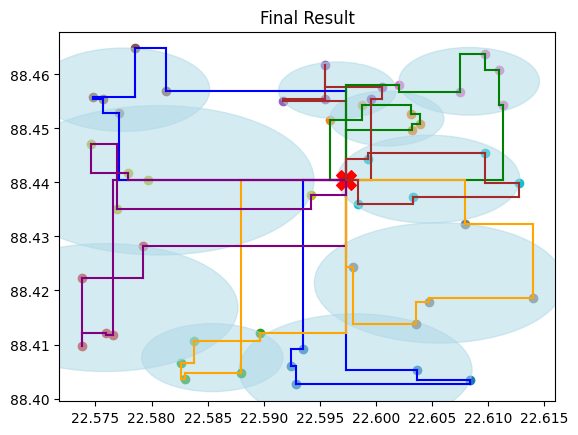

In [73]:
# Cluster the data and get the labels and centroids
centroids_3, clusters_3 = KMeans(delivery_loc, n, k)

# Calculate DP
DP_3 = calculate_dp(centroids_3)

# Shortest path calculation in each cluster
for i in clusters_3:
    clusters_3[i] = tsp_brut(clusters_3[i], DP_3)

for i in clusters_3:
    print("Path",i,":")
    for j in clusters_3[i]:
        print(j,"->",end=" ")
    print("End")

dist_3 = total_distance(clusters_3)
print("\nDistance using manhattan cluster and bruteforce TSP :",dist_3)

final_plot(clusters_3, DP_3)

*Approach 4 : Euclidean cluster with bruteforce TSP*

Path 0 :
[22.59812, 88.43934] -> [22.5792, 88.4282] -> [22.5769, 88.435] -> [22.5746, 88.4472] -> [22.5779, 88.4417] -> [22.5797, 88.4405] -> [22.59812, 88.43934] -> End
Path 1 :
[22.59812, 88.43934] -> [22.5897, 88.4122] -> [22.5826, 88.4066] -> [22.583, 88.4037] -> [22.588, 88.4047] -> [22.5924, 88.406] -> [22.59812, 88.43934] -> End
Path 2 :
[22.59812, 88.43934] -> [22.6032, 88.4497] -> [22.6039, 88.4509] -> [22.6031, 88.4526] -> [22.5996, 88.4554] -> [22.5988, 88.4544] -> [22.59812, 88.43934] -> End
Path 3 :
[22.59812, 88.43934] -> [22.6128, 88.4399] -> [22.6079, 88.4323] -> [22.614, 88.4186] -> [22.6047, 88.4179] -> [22.598, 88.4244] -> [22.59812, 88.43934] -> End
Path 4 :
[22.59812, 88.43934] -> [22.5942, 88.4376] -> [22.5984, 88.436] -> [22.6033, 88.4373] -> [22.6097, 88.4455] -> [22.5993, 88.4444] -> [22.59812, 88.43934] -> End
Path 5 :
[22.59812, 88.43934] -> [22.5838, 88.4107] -> [22.5766, 88.4118] -> [22.5759, 88.4122] -> [22.5738, 88.4097] -> [22.5738, 88.4223] -> [22.59812

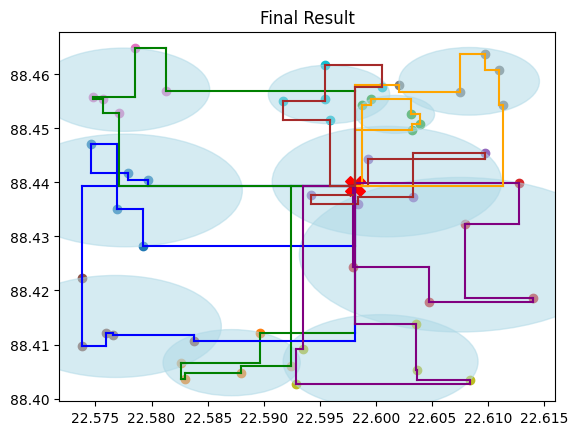

In [74]:
# Cluster the data and get the labels and centroids
centroids_4, clusters_4 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_4 = calculate_dp(centroids_4)

# Shortest path calculation in each cluster
for i in clusters_4:
    clusters_4[i] = tsp_brut(clusters_4[i], DP_4)

for i in clusters_4:
    print("Path",i,":")
    for j in clusters_4[i]:
        print(j,"->",end=" ")
    print("End")

dist_4 = total_distance(clusters_4)
print("\nDistance using euclidean cluster and bruteforce TSP :",dist_4)

final_plot(clusters_4, DP_4)

In [75]:
#Results

print("Distance using manhattan cluster and non-bruteforce TSP :",dist_1)
print("Distance using euclidean cluster and non-bruteforce TSP :",dist_2)
print("Distance using manhattan cluster and bruteforce TSP :",dist_3)
print("Distance using euclidean cluster and bruteforce TSP :",dist_4)

Distance using manhattan cluster and non-bruteforce TSP : 0.8718399999999917
Distance using euclidean cluster and non-bruteforce TSP : 0.8718399999999917
Distance using manhattan cluster and bruteforce TSP : 0.8011599999999248
Distance using euclidean cluster and bruteforce TSP : 0.8195999999998946


*<font color="red">failed attempt</font>*

In [76]:
import networkx as nx

def create_graph(edges):
    graph = nx.MultiGraph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1])
    return graph

def find_eulerian_circuit(graph):
    return list(nx.eulerian_circuit(graph))

def calculate_distance(point1, point2):
    return (abs(point1[0] - point2[0]) + abs(point1[1] - point2[1]))

def create_minimum_spanning_tree(points):
    # Create a graph
    G = nx.Graph()
    # Add nodes
    for i, point in enumerate(points):
        G.add_node(i, pos=point)
    # Add edges based on distances
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distance = calculate_distance(points[i], points[j])
            G.add_edge(i, j, weight=distance)
    # Compute the minimum spanning tree
    mst = nx.minimum_spanning_tree(G)
    return mst

def find_perfect_matching(odd_degree_vertices, distances):
    # Implement Blossom V algorithm to find perfect matching
    # (You may need to install networkx library for this)
    G = nx.Graph()
    # Add odd degree vertices
    for vertex in odd_degree_vertices:
        G.add_node(vertex)
    # Add edges with corresponding weights
    for i in range(len(odd_degree_vertices)):
        for j in range(i+1, len(odd_degree_vertices)):
            v1 = odd_degree_vertices[i]
            v2 = odd_degree_vertices[j]
            # weight = distances[v1][v2]
            weight = distances[(v1, v2)]
            G.add_edge(v1, v2, weight=weight)
    # Compute maximum matching
    matching = nx.max_weight_matching(G, maxcardinality=True)
    # Extract edges from matching
    matching_edges = [(min(u, v), max(u, v)) for u, v in matching]
    return matching_edges

def convert_to_eulerian_circuit(tree_edges, matching_edges):
    graph = create_graph(tree_edges + matching_edges)  # Combine edges into a multigraph
    eulerian_circuit = find_eulerian_circuit(graph)  # Use Hierholzer's algorithm
    return eulerian_circuit

def shortcut_circuit(eulerian_circuit):
    tour = []
    for vertex in eulerian_circuit:
        if vertex not in tour:
            tour.append(vertex)
    return tour

def create_distance_matrix(points):
    distances = {}
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distances[(i, j)] = calculate_distance(points[i], points[j])
            distances[(j, i)] = distances[(i, j)]  # Since it's undirected
    return distances

def christofides_tsp(points, opt_dp):
    cluster = points.copy()
    cluster.insert(0, opt_dp)  # Add depot to the cluster

    # 1. Create a minimum spanning tree
    mst = create_minimum_spanning_tree(cluster)

    # 2. Find vertices with odd degree in the MST
    odd_degree_vertices = [vertex for vertex, degree in mst.degree() if degree % 2 == 1]

    # 3. Find a minimum-weight perfect matching for odd-degree vertices
    distances = create_distance_matrix(cluster)  # Precalculate distances
    print(distances)
    matching_edges = find_perfect_matching(odd_degree_vertices, distances)

    # 4. Combine MST edges and matching edges to create an Eulerian circuit
    eulerian_circuit = convert_to_eulerian_circuit(mst.edges(), matching_edges)

    # 5. Shortcut the Eulerian circuit to form a Hamiltonian circuit (TSP tour)
    tour = shortcut_circuit(eulerian_circuit)

    return tour